In [1]:
import os
from glob import glob
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scikit_posthocs import posthoc_dunn
from statannotations.Annotator import Annotator
plt.style.use('figure.mplstyle')

from function.data2p import get_data_bis
import function.utils as ut

In [2]:
folder = r'D:\LW_Alldata\SI_Transient'
alldata = {'Enriched': glob(os.path.join(folder,'Enriched*.hdf5')),
           'Dissimilar': glob(os.path.join(folder,'Distinct*.hdf5')),
           'Similar': glob(os.path.join(folder,'Similar*.hdf5'))}
exps = ['Enriched','Dissimilar','Similar']
day = 1  # Recording days, None for all days
min_rate = 1/60  # Minimum transient rate for active cells
pval_thr = 0.05  # P-value threshold for selecting place cells

## Cell properties by context

In [3]:
auc_list = []
si_list = []
rel_list = []
dauc_list = []  # Signed selectivity score
dauc_mean = []  # Mean |selectivity score| per mouse
for p, exp in enumerate(exps):
    print('Get %s datasets ...' % exp)
    auc, si, rel = [], [], []
    for m, datapath in enumerate(alldata[exp]):
        data, cells, days, ctx, _ = get_data_bis(datapath, day=day, min_rate=min_rate)
        auc.append(60*cells['trate'].T)  # (2,ncell)
        # auc.append(cells['tauc'].T)  # (2,ncell)
        si.append(cells['si_unbiased'].T)  # (2,ncell)
        rel.append(cells['reliability'].T)  # (2,ncell)
    
    auc_list.append(auc)
    si_list.append(si)
    rel_list.append(rel)
    dauc = [(a[1]-a[0])/(a[1]+a[0]) for a in auc]  # Selectivity score (list of mice)
    dauc_list.append(np.hstack(dauc))  # Pool cells of all mice
    dauc_mean.append([np.mean(np.abs(da)) for da in dauc])
    
dauc_abs = [np.abs(dauc) for dauc in dauc_list]  # Pool cells of all mice

Get Enriched datasets ...
Get Dissimilar datasets ...
Get Similar datasets ...


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Fam vs. 2_Nov: Wilcoxon test (paired samples), P_val:1.774e-01 Stat=6.090e+02
1_Fam vs. 1_Nov: Wilcoxon test (paired samples), P_val:3.927e-01 Stat=6.500e+01
3_Fam vs. 3_Nov: Wilcoxon test (paired samples), P_val:8.950e-01 Stat=1.400e+03
4_Fam vs. 4_Nov: Wilcoxon test (paired samples), P_val:5.221e-03 Stat=4.000e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Fam vs. 2_Nov: Wilcoxon test (paired samples), P_val:2.857e-04 Stat=3.370e+02
1_Fam vs. 1_Nov: Wilcoxon test (paired samples), P_val:9.265e-01 Stat=7.400e+01
3_Fam vs. 3_Nov: Wilcoxon test (paired samples), P_val:9.335e-01 Stat=1.372e+03
4_Fam vs. 4_Nov: Wilcoxon test (paired samples), P_val:5.985e-01 Stat=5.820e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-0

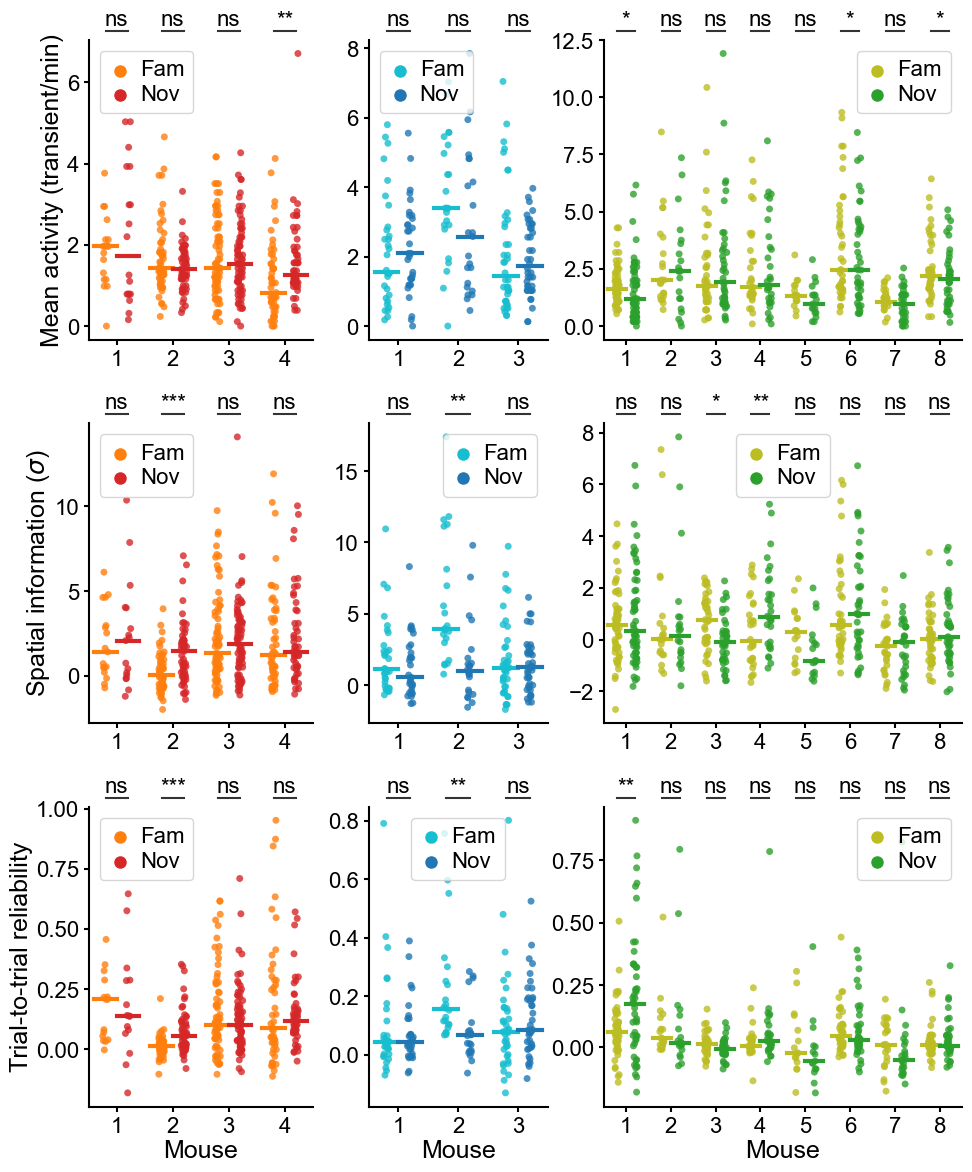

In [4]:
Ns = [len(auc) for auc in auc_list]
palettes = [['tab:orange','tab:red'],
            ['tab:cyan','tab:blue'],
            ['tab:olive','tab:green']]

fig, axs = plt.subplots(3,3, figsize=(10,12), gridspec_kw={'width_ratios':[5,4,8]})
for p in range(3):
    ut.compare_paired(auc_list[p], varnames=['Mouse','Context','AUC'], 
                      varvalues=[np.arange(Ns[p])+1,['Fam','Nov'],None],
                      palette=palettes[p], fig=fig, ax=axs[0,p], dodge=True, alpha=0.8, rasterized=True)
    ut.compare_paired(ut.discard_zero(si_list[p]), varnames=['Mouse','Context','SI'], 
                      varvalues=[np.arange(Ns[p])+1,['Fam','Nov'],None],
                      palette=palettes[p], fig=fig, ax=axs[1,p], dodge=True, alpha=0.8, rasterized=True)
    ut.compare_paired(ut.discard_zero(rel_list[p]), varnames=['Mouse','Context','Reliability'], 
                      varvalues=[np.arange(Ns[p])+1,['Fam','Nov'],None],
                      palette=palettes[p], fig=fig, ax=axs[2,p], dodge=True, alpha=0.8, rasterized=True)
for ax in axs.ravel():
    ax.set(xlabel='', ylabel='')
axs[0,0].set_ylabel('Mean activity (transient/min)')  # $\Delta F/F\: s^{-1}$
axs[1,0].set_ylabel('Spatial information ($\sigma$)')
axs[2,0].set_ylabel('Trial-to-trial reliability')
for p in range(3):
    axs[2,p].set_xlabel('Mouse')

fig.tight_layout()
fig.subplots_adjust(wspace=0.22)
# fig.savefig('Cells property day1.svg', dpi=200)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Dissimilar_Fam vs. Dissimilar_Nov: Wilcoxon test (paired samples), P_val:3.333e-01 Stat=1.933e+03
Enriched_Fam vs. Enriched_Nov: Wilcoxon test (paired samples), P_val:5.043e-01 Stat=9.122e+03
Similar_Fam vs. Similar_Nov: Wilcoxon test (paired samples), P_val:2.446e-02 Stat=1.613e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Dissimilar_Fam vs. Dissimilar_Nov: Wilcoxon test (paired samples), P_val:6.482e-03 Stat=1.475e+03
Enriched_Fam vs. Enriched_Nov: Wilcoxon test (paired samples), P_val:3.683e-02 Stat=7.993e+03
Similar_Fam vs. Similar_Nov: Wilcoxon test (paired samples), P_val:9.519e-01 Stat=1.903e+04


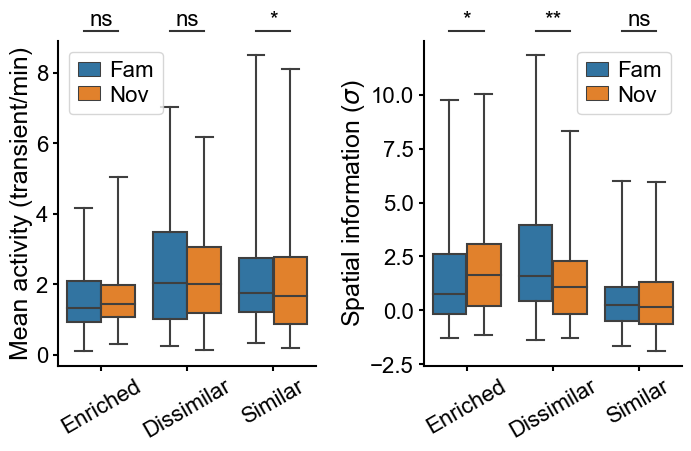

In [5]:
## Pool cells of all mice
auc_pool = [np.hstack(auc) for auc in auc_list]
auc_pool = ut.discard_zero(auc_pool)
si_pool = [np.hstack(si) for si in si_list]
si_pool = ut.discard_zero(si_pool)
    
fig, axs = plt.subplots(1,2,figsize=(7.2,4.8))
ut.compare_grouped(auc_pool, varnames=['Experiment','Context','AUC'], varvalues=[exps,['Fam','Nov'],None],
                   fig=fig, ax=axs[0], kind='box', test='Wilcoxon', whis=(1,99), showfliers=False)
axs[0].set(xlabel='', ylabel='Mean activity (transient/min)')  # $\Delta F/F\: s^{-1}$

ut.compare_grouped(si_pool, varnames=['Experiment','Context','SI'], varvalues=[exps,['Fam','Nov'],None],
                   fig=fig, ax=axs[1], kind='box', test='Wilcoxon', whis=(1,99), showfliers=False)
axs[1].set(xlabel='', ylabel='Spatial information ($\sigma$)')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # ha='right'
    
fig.tight_layout()
# fig.savefig('Cells property.svg')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Dissimilar_Fam vs. Dissimilar_Nov: Wilcoxon test (paired samples), P_val:3.167e-01 Stat=1.840e+03
Enriched_Fam vs. Enriched_Nov: Wilcoxon test (paired samples), P_val:1.658e-01 Stat=7.762e+03
Similar_Fam vs. Similar_Nov: Wilcoxon test (paired samples), P_val:9.040e-01 Stat=1.630e+04


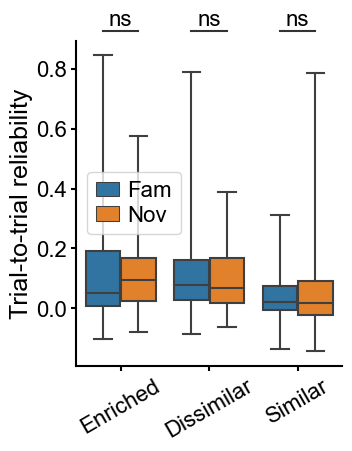

In [6]:
rel_pool = [np.hstack(rel) for rel in rel_list]
rel_pool = ut.discard_zero(rel_pool)

fig, ax = plt.subplots(figsize=(3.8,4.8))
ut.compare_grouped(rel_pool, varnames=['Experiment','Context','AUC'], varvalues=[exps,['Fam','Nov'],None],
                   fig=fig, ax=ax, kind='box', test='Wilcoxon', whis=(1,99), showfliers=False)
ax.set(xlabel='', ylabel='Trial-to-trial reliability')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # ha='right'
fig.tight_layout()
# fig.savefig('Cells property rel.svg')

In [9]:
## Cross-experiment test
si_fam = [si[0] for si in si_pool]  # Famv for three experiments
si_nov = [si[1] for si in si_pool]  # Nov for three experiments

stat, pval = stats.kruskal(*si_nov, nan_policy='omit')
print('Kruskal-Wallis test, p-value: %.4g' % pval)
pval_paired = posthoc_dunn(si_nov, p_adjust='bonferroni').to_numpy()
print('Post-hoc Dunn\'s test')
for u, v in zip([0,0,1],[1,2,2]):
    print(f'{exps[u]} vs {exps[v]} p-value: {pval_paired[u,v]:.4g}')
print('-'*32)

Kruskal-Wallis test, p-value: 5.658e-13
Post-hoc Dunn's test
Enriched vs Dissimilar p-value: 0.1023
Enriched vs Similar p-value: 3.762e-13
Dissimilar vs Similar p-value: 0.001163
--------------------------------


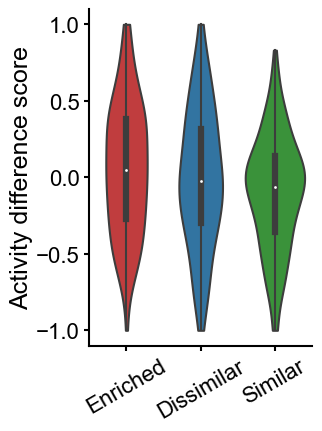

In [13]:
fig, ax = plt.subplots(figsize=(3.5,4.6))
ut.compare_multiple(dauc_list, category=exps, palette=['tab:red','tab:blue','tab:green'],
                    fig=fig, ax=ax, kind='violin', show_data=False, annotate=False, test='none')
ax.set_xticklabels(exps, rotation=30)
ax.set(xlabel='', ylabel='Activity difference score')
fig.tight_layout()
# fig.savefig('Selectivity signed.svg')

Kruskal-Wallis test, p-value: 0.010530
Post-hoc Dunn's test
Enriched vs Dissimilar p-value: 1.000000
Enriched vs Similar p-value: 0.017053
Dissimilar vs Similar p-value: 0.123978


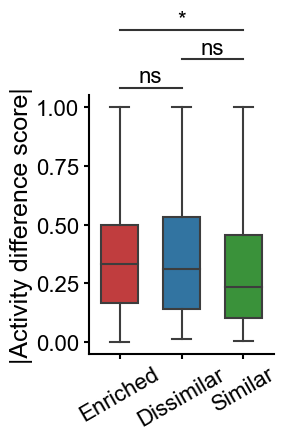

In [14]:
fig, ax = plt.subplots(figsize=(3,5))
ut.compare_multiple(dauc_abs, category=exps, palette=['tab:red','tab:blue','tab:green'],
                    fig=fig, ax=ax, kind='box', show_data=False, annotate=True,
                    test='kruskal', post_hoc='dunn')
ax.set_xticklabels(exps, rotation=30)
ax.set(xlabel='', ylabel='|Activity difference score|')
fig.tight_layout()
# fig.savefig('Selectivity absolute.svg')

One-way ANOVA test, p-value: 0.236340
Post-hoc Tukey HSD test's test
Enriched vs Dissimilar p-value: 0.956270
Enriched vs Similar p-value: 0.259929
Dissimilar vs Similar p-value: 0.486988


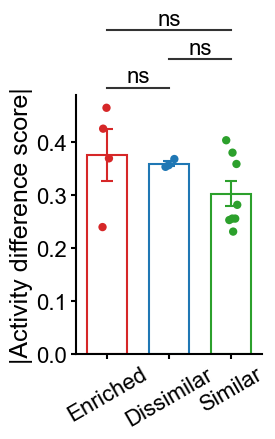

In [20]:
fig, ax = plt.subplots(figsize=(3,5))
ut.compare_multiple(dauc_mean, category=exps, palette=['tab:red','tab:blue','tab:green'],
                    fig=fig, ax=ax, kind='bar', show_data=True, annotate=True,
                    test='anova', post_hoc='tukey')
ax.set_xticks(range(len(exps)))
ax.set_xticklabels(exps, rotation=30)
ax.set(xlabel='', ylabel='|Activity difference score|')
ax.get_legend().remove()
fig.tight_layout()

## Cell properties by category (session)

In [24]:
SI_list = []
SI_list_mean = []
for p, exp in enumerate(exps):
    print('Get %s datasets ...' % exp)
    si_list = []
    for m, datapath in enumerate(alldata[exp]):
        with h5py.File(datapath, 'r') as f:  # properties/
            rate = f['transient_rate'][()]  # (ncell,nday*nsession=4)
            active = (rate[:,0] > min_rate)  # 1st familiar session only
            si = f['spatial_info'][active,0]  # (ncell,)
            si_shuffle = f['spatial_info_shuffle'][:,active,0]  # (nshuffle,ncell)
        n_shuffle = si_shuffle.shape[0]
        shuffle_std = np.std(si_shuffle, axis=0)  # (ncell,)
        shuffle_nan = (shuffle_std == 0)
        si_unbiased = (si - si_shuffle.mean(axis=0))
        si_unbiased[shuffle_nan] = 0  # np.NaN
        si_unbiased[~shuffle_nan] /= shuffle_std[~shuffle_nan]
        si_pvalue = np.sum(si_shuffle>=si[np.newaxis,:], axis=0)/n_shuffle
        pc = (si_pvalue < pval_thr)
        # si_list.append(si_unbiased)  # (ncell,)
        si_list.append(si_unbiased[pc])  # (ncell,)
    SI_list.append(np.hstack(si_list))
    SI_list_mean.append(np.array([np.mean(si) for si in si_list]))
    print('Number of active cells: %d' % len(SI_list[-1]))

Get Enriched datasets ...
Number of active cells: 40
Get Dissimilar datasets ...
Number of active cells: 38
Get Similar datasets ...
Number of active cells: 38


In [25]:
SI_list_mean

[array([4.41391049, 2.8499861 , 4.15885341, 6.07334064]),
 array([3.28182068, 4.28968179, 3.67231218]),
 array([3.30533929, 3.44917061, 2.76097879, 2.57498217, 2.20066445,
        3.7757616 , 2.33755195, 3.08327013])]

One-way ANOVA test, p-value: 0.037816
Post-hoc Tukey HSD test's test
Enriched vs Dissimilar p-value: 0.586963
Enriched vs Similar p-value: 0.034155
Dissimilar vs Similar p-value: 0.337636


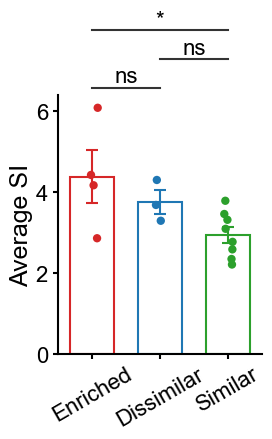

In [26]:
fig, ax = plt.subplots(figsize=(3,5))
ut.compare_multiple(SI_list_mean, category=exps, palette=['tab:red','tab:blue','tab:green'],
                    fig=fig, ax=ax, kind='bar', show_data=True, annotate=True,
                    test='anova', post_hoc='tukey')
ax.set_xticks(range(len(exps)))
ax.set_xticklabels(exps, rotation=30)
ax.set(xlabel='', ylabel='Average SI')
ax.get_legend().remove()
fig.tight_layout()